# 一、数据读取

In [1]:
import pandas as pd
import numpy as np  

In [ ]:
# data = ····

# 二、基础数据分析

In [1]:

import pandas as pd
import seaborn as sns
sns.set_style('white',{'font.sans-serif':['simhei','Arial']})
import matplotlib.pyplot as plt
import matplotlib as mpl
# 设置字体以支持中文显示
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
mpl.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

gaokao_merged_df = pd.read_excel("data/最终数据集.xlsx")

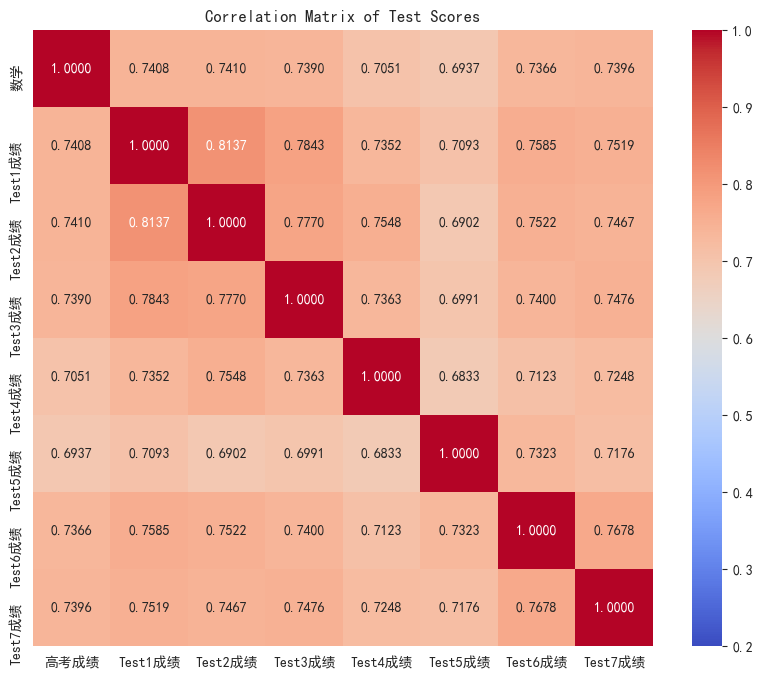

In [5]:
# 计算相关矩阵
corr_matrix = gaokao_merged_df[['数学', 'Test1成绩', 'Test2成绩', 'Test3成绩', 'Test4成绩', 'Test5成绩', 'Test6成绩', 'Test7成绩']].corr()
corr_matrix.columns = ['高考成绩', 'Test1成绩', 'Test2成绩', 'Test3成绩', 'Test4成绩', 'Test5成绩', 'Test6成绩', 'Test7成绩']
# 画出相关性热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0.2, vmax=1, fmt='.4f')
plt.title('Correlation Matrix of Test Scores')
plt.show()

In [31]:
from scipy.stats import ttest_ind, ks_2samp
import numpy as np
df = df6.copy()
# df['Test3成绩'] = df['Test3成绩'] - df['Test3成绩'].mean() + gaokao_data['数学'].mean()
# t检验
t_stat, t_p_value = ttest_ind(gaokao_data['数学'].dropna(), df['Test6成绩'].dropna())
print(f'T检验统计量: {t_stat}, p值: {t_p_value}')

# 置换检验
def permutation_test(data1, data2, num_permutations=10000):
    observed_diff = np.mean(data1) - np.mean(data2)
    combined_data = np.concatenate([data1, data2])
    count = 0
    for _ in range(num_permutations):
        np.random.shuffle(combined_data)
        new_data1 = combined_data[:len(data1)]
        new_data2 = combined_data[len(data1):]
        new_diff = np.mean(new_data1) - np.mean(new_data2)
        if abs(new_diff) >= abs(observed_diff):
            count += 1
    p_value = count / num_permutations
    return observed_diff, p_value

perm_stat, perm_p_value = permutation_test(gaokao_data['数学'].dropna().values, df['Test6成绩'].dropna().values)
print(f'置换检验统计量: {perm_stat}, p值: {perm_p_value}')

# 拟合优度检验（Kolmogorov-Smirnov检验）
ks_stat, ks_p_value = ks_2samp(gaokao_data['数学'].dropna(), df['Test6成绩'].dropna())
print(f'KS检验统计量: {ks_stat}, p值: {ks_p_value}')

T检验统计量: 0.1849239538299735, p值: 0.8533140022430069
置换检验统计量: 0.17288992928233426, p值: 0.8523
KS检验统计量: 0.05711068913334497, p值: 0.16868826959267566


这段内容给出了三种检验方法的统计量和 p 值结果。

T 检验统计量为 0.1849239538299735，对应的 p 值为 0.8533140022430069。一般来说，T 检验用于比较两组数据的均值是否有显著差异，统计量的值反映了两组数据差异的大小，而 p 值用于判断这种差异是否具有统计学意义。这里的 p 值较大，说明在给定的显著性水平下，不能拒绝原假设，即认为两组数据的均值没有显著差异。

置换检验统计量为 0.17288992928233426，p 值为 0.8542。置换检验是一种非参数检验方法，通过对数据进行随机重排来计算统计量和 p 值，用于判断两组或多组数据之间的差异是否具有统计学意义。同样，这里较大的 p 值表明在当前情况下不能得出数据之间存在显著差异的结论。

KS 检验统计量为 0.05711068913334497，p 值为 0.16868826959267566。KS 检验全称 Kolmogorov-Smirnov 检验，主要用于检验两个样本是否来自同一分布。这里的 p 值相对前两个检验稍小一些，但仍然较大，说明不能有力地证明两个样本不是来自同一分布。

In [25]:

# 合并数据
merged_df = pd.merge(gaokao_data[['姓名', '数学', '高考数学校排名']], df6[['姓名', 'Test6成绩', 'Test6校排名']], on='姓名', how='inner')

# 计算成绩差和排名差
merged_df['成绩差'] = merged_df['数学'] - merged_df['Test6成绩']
merged_df['排名差'] = merged_df['高考数学校排名'] - merged_df['Test6校排名']

# 计算MAE
成绩差_MAE = merged_df['成绩差'].abs().mean()
排名差_MAE = merged_df['排名差'].abs().mean()

print(f'成绩差的MAE: {成绩差_MAE}')
print(f'排名差的MAE: {排名差_MAE}')

成绩差的MAE: 10.606612685560053
排名差的MAE: 121.70985155195682


In [16]:
# 初始化存储结果的字典
results = {}

# 遍历每个考试数据框
for i in range(1, 8):
    test_name = f'Test{i}'
    df_test = globals()[f'df{i}']
    
    # 合并数据
    merged_df = pd.merge(gaokao_data[['姓名', '数学', '高考数学校排名']], df_test[['姓名', f'{test_name}成绩', f'{test_name}校排名']], on='姓名', how='inner')
    
    # 计算成绩差和排名差
    merged_df['成绩差'] = merged_df['数学'] - merged_df[f'{test_name}成绩']
    merged_df['排名差'] = merged_df['高考数学校排名'] - merged_df[f'{test_name}校排名']
    
    # 计算MAE
    成绩差_MAE = merged_df['成绩差'].abs().mean()
    排名差_MAE = merged_df['排名差'].abs().mean()
    
    # 计算相关系数
    correlation = merged_df[['数学', f'{test_name}成绩']].corr().iloc[0, 1]
    
    # 存储结果
    results[test_name] = {
        '成绩差_MAE': 成绩差_MAE,
        '排名差_MAE': 排名差_MAE,
        '相关系数': correlation
    }
    
    # 打印结果
    print(f'{test_name}与高考排名的MAOE: {排名差_MAE:.3f}, 相关系数: {correlation:.3f}')

# 找出最相似的两场考试
most_similar_test = max(results, key=lambda x: (results[x]['相关系数'], -results[x]['成绩差_MAE'], -results[x]['排名差_MAE']))


Test1与高考排名的MAOE: 116.979, 相关系数: 0.739
Test2与高考排名的MAOE: 129.769, 相关系数: 0.736
Test3与高考排名的MAOE: 120.622, 相关系数: 0.739
Test4与高考排名的MAOE: 127.382, 相关系数: 0.705
Test5与高考排名的MAOE: 130.666, 相关系数: 0.690
Test6与高考排名的MAOE: 121.605, 相关系数: 0.734
Test7与高考排名的MAOE: 118.668, 相关系数: 0.737


In [44]:
# 计算高考总分省排名和 Test6 总分省排名的相关系数
correlation_1 = gaokao_data['高考总分省排名'].corr(gaokao_data['数学'])

# 计算高考数学成绩和 Test6 成绩的相关系数
correlation_2 = df6['Test6总分省排名'].corr(df6['Test6成绩'])

print(f'高考总分省排名和 Test6 总分省排名的相关系数: {correlation_1}')
print(f'高考数学成绩和 Test6 成绩的相关系数: {correlation_2}')

高考总分省排名和 Test6 总分省排名的相关系数: -0.6410079370963128
高考数学成绩和 Test6 成绩的相关系数: -0.6621395629106944


## 描述性统计

In [ ]:
import pandas as pd
# 去掉姓名列为空的行
gaokao_data = gaokao_data[gaokao_data['姓名'].notna()]
# 去掉高考成绩为空的行
gaokao_data = gaokao_data[gaokao_data['数学'].notna()]
# 去掉姓名为'翁欣'的行
gaokao_data = gaokao_data[gaokao_data['姓名'] != '翁欣']
gaokao_data['高考数学校排名'] = gaokao_data['数学'].rank(ascending=False, method='min')
gaokao_data['高考数学班级排名'] = gaokao_data.groupby('班级')['数学'].rank(ascending=False, method='min')
Teacher_dict={'1':'Teacher A','2':'Teacher A',
              '3':'Teacher B','4':'Teacher B',
              '5':'Teacher C','6':'Teacher C',
              '7':'Teacher D','8':'Teacher D',
              '9':'Teacher E','10':'Teacher E',
              '11':'Teacher F','12':'Teacher F',
              '13':'Teacher G','14':'Teacher G',
              '15':'Teacher H','16':'Teacher H',
}
gaokao_data['班级'] = gaokao_data['班级'].astype(str)
gaokao_data['Teacher'] = gaokao_data['班级'].map(Teacher_dict)
# 计算每个type下target的均值、标准差、最大值和最小值
# test_name = "test3"
statistics = gaokao_data.groupby('班级')['数学'].agg(['mean', 'std', 'max', 'min', 'count']).reset_index()
statistics.head(20)
# 计算总体均值、标准差、最大值和最小值、计数
overall_mean = gaokao_data['数学'].mean(skipna=True)
overall_std = gaokao_data['数学'].std(skipna=True)
overall_max = gaokao_data['数学'].max(skipna=True)
overall_min = gaokao_data['数学'].min(skipna=True)
overall_count = gaokao_data['数学'].count()
print(f"总体均值: {overall_mean:.4f}", f"总体标准差: {overall_std:.4f}", f"总体最大值: {overall_max:.2f}", f"总体最小值: {overall_min:.2f}", f"总体计数: {overall_count}")

总体均值: 79.1772 总体标准差: 17.1609 总体最大值: 128.00 总体最小值: 24.00 总体计数: 745


## 箱线图

c:\Users\August\Desktop\Python\数据分析项目\成绩分析\.conda\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


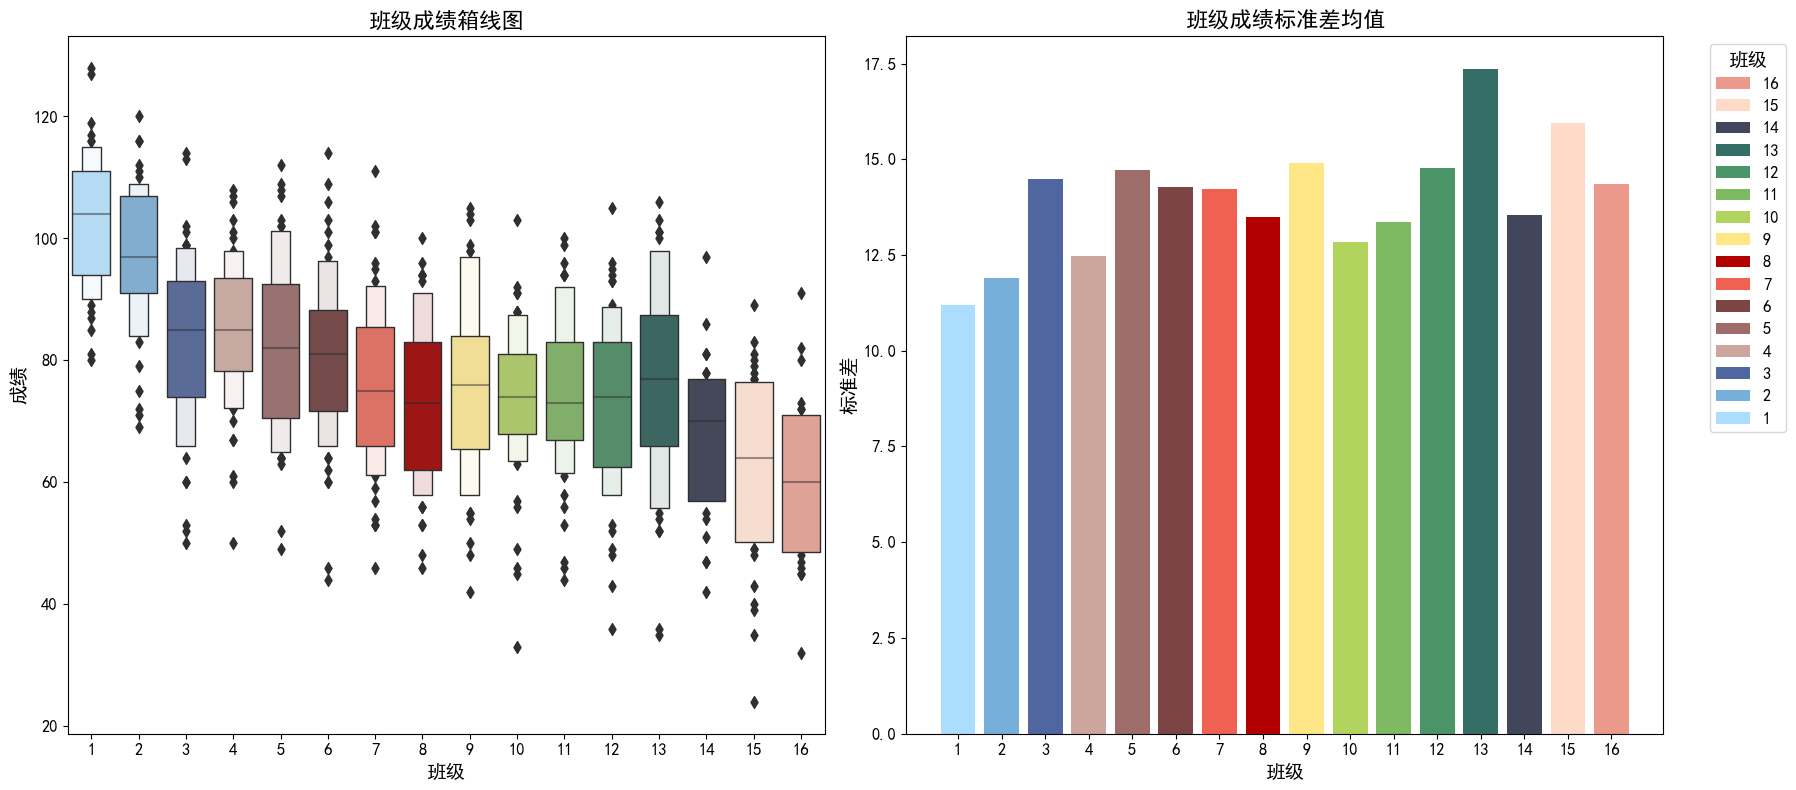

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt



# 假设 df3 是你的数据框
data = gaokao_data.copy()
#按班级排序（先数值化）
data['班级'] = data['班级'].astype(int)
data = data.sort_values(by='班级', ascending=False)
# 将班级列转换为类别类型
data['班级'] = data['班级'].astype('category')

# 计算每种班级对应的总分均值
type_target_df = gaokao_data.groupby('班级')[f'数学'].mean().reset_index()
type_target_df["班级"] = type_target_df["班级"].astype(int)
type_target_df = type_target_df.sort_values(by='班级', ascending=False)
type_target_df["班级"] = type_target_df["班级"].astype(str)
type_target_df.columns = ['班级', f'数学']

# 计算每种班级对应的数学成绩标准差
type_target_df['标准差'] = gaokao_data.groupby('班级')[f'数学'].std().reset_index()[f'数学']

# 自定义颜色
mycol22 = ["#eb998b", "#fddbc8", "#42465c", "#356d67", "#4c9568",
           "#7fb961", "#b0d45d", "#ffe788", "#b20000", "#f06152",
           "#7d4444", "#9e6c69", "#cca69c", "#5066a1", "#76afda",
           "#abddff", "#dcf2ff", "#e8743c", "#ffc556", "#35212e",
           "#562e3c", "#a14462"]
mycol22_inverse = mycol22[:len(list(data['班级'].cat.categories))][::-1]
# 创建一个包含两个子图的图形
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharey=False)

# 绘制箱线图
sns.boxenplot(x='班级', y='数学', data=data, palette=mycol22_inverse, ax=ax1)
ax1.set_xlabel('班级', fontsize=14)
ax1.set_ylabel('成绩', fontsize=14)
ax1.set_title('班级成绩箱线图', fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=12)

# 绘制柱状图（bar plot）
bars = ax2.bar(type_target_df['班级'], type_target_df['标准差'], color=[mycol22[i % len(mycol22)] for i in range(len(type_target_df))], alpha=1)
ax2.set_xlabel('班级', fontsize=14)
ax2.set_ylabel('标准差', fontsize=14)
ax2.set_title('班级成绩标准差均值', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.invert_xaxis()
# 为柱状图添加图例
ax2.legend(bars, type_target_df['班级'], title='班级', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# 调整布局以避免重叠
plt.tight_layout()
plt.show()

## pairplot

IndexError: index 9 is out of bounds for axis 1 with size 9

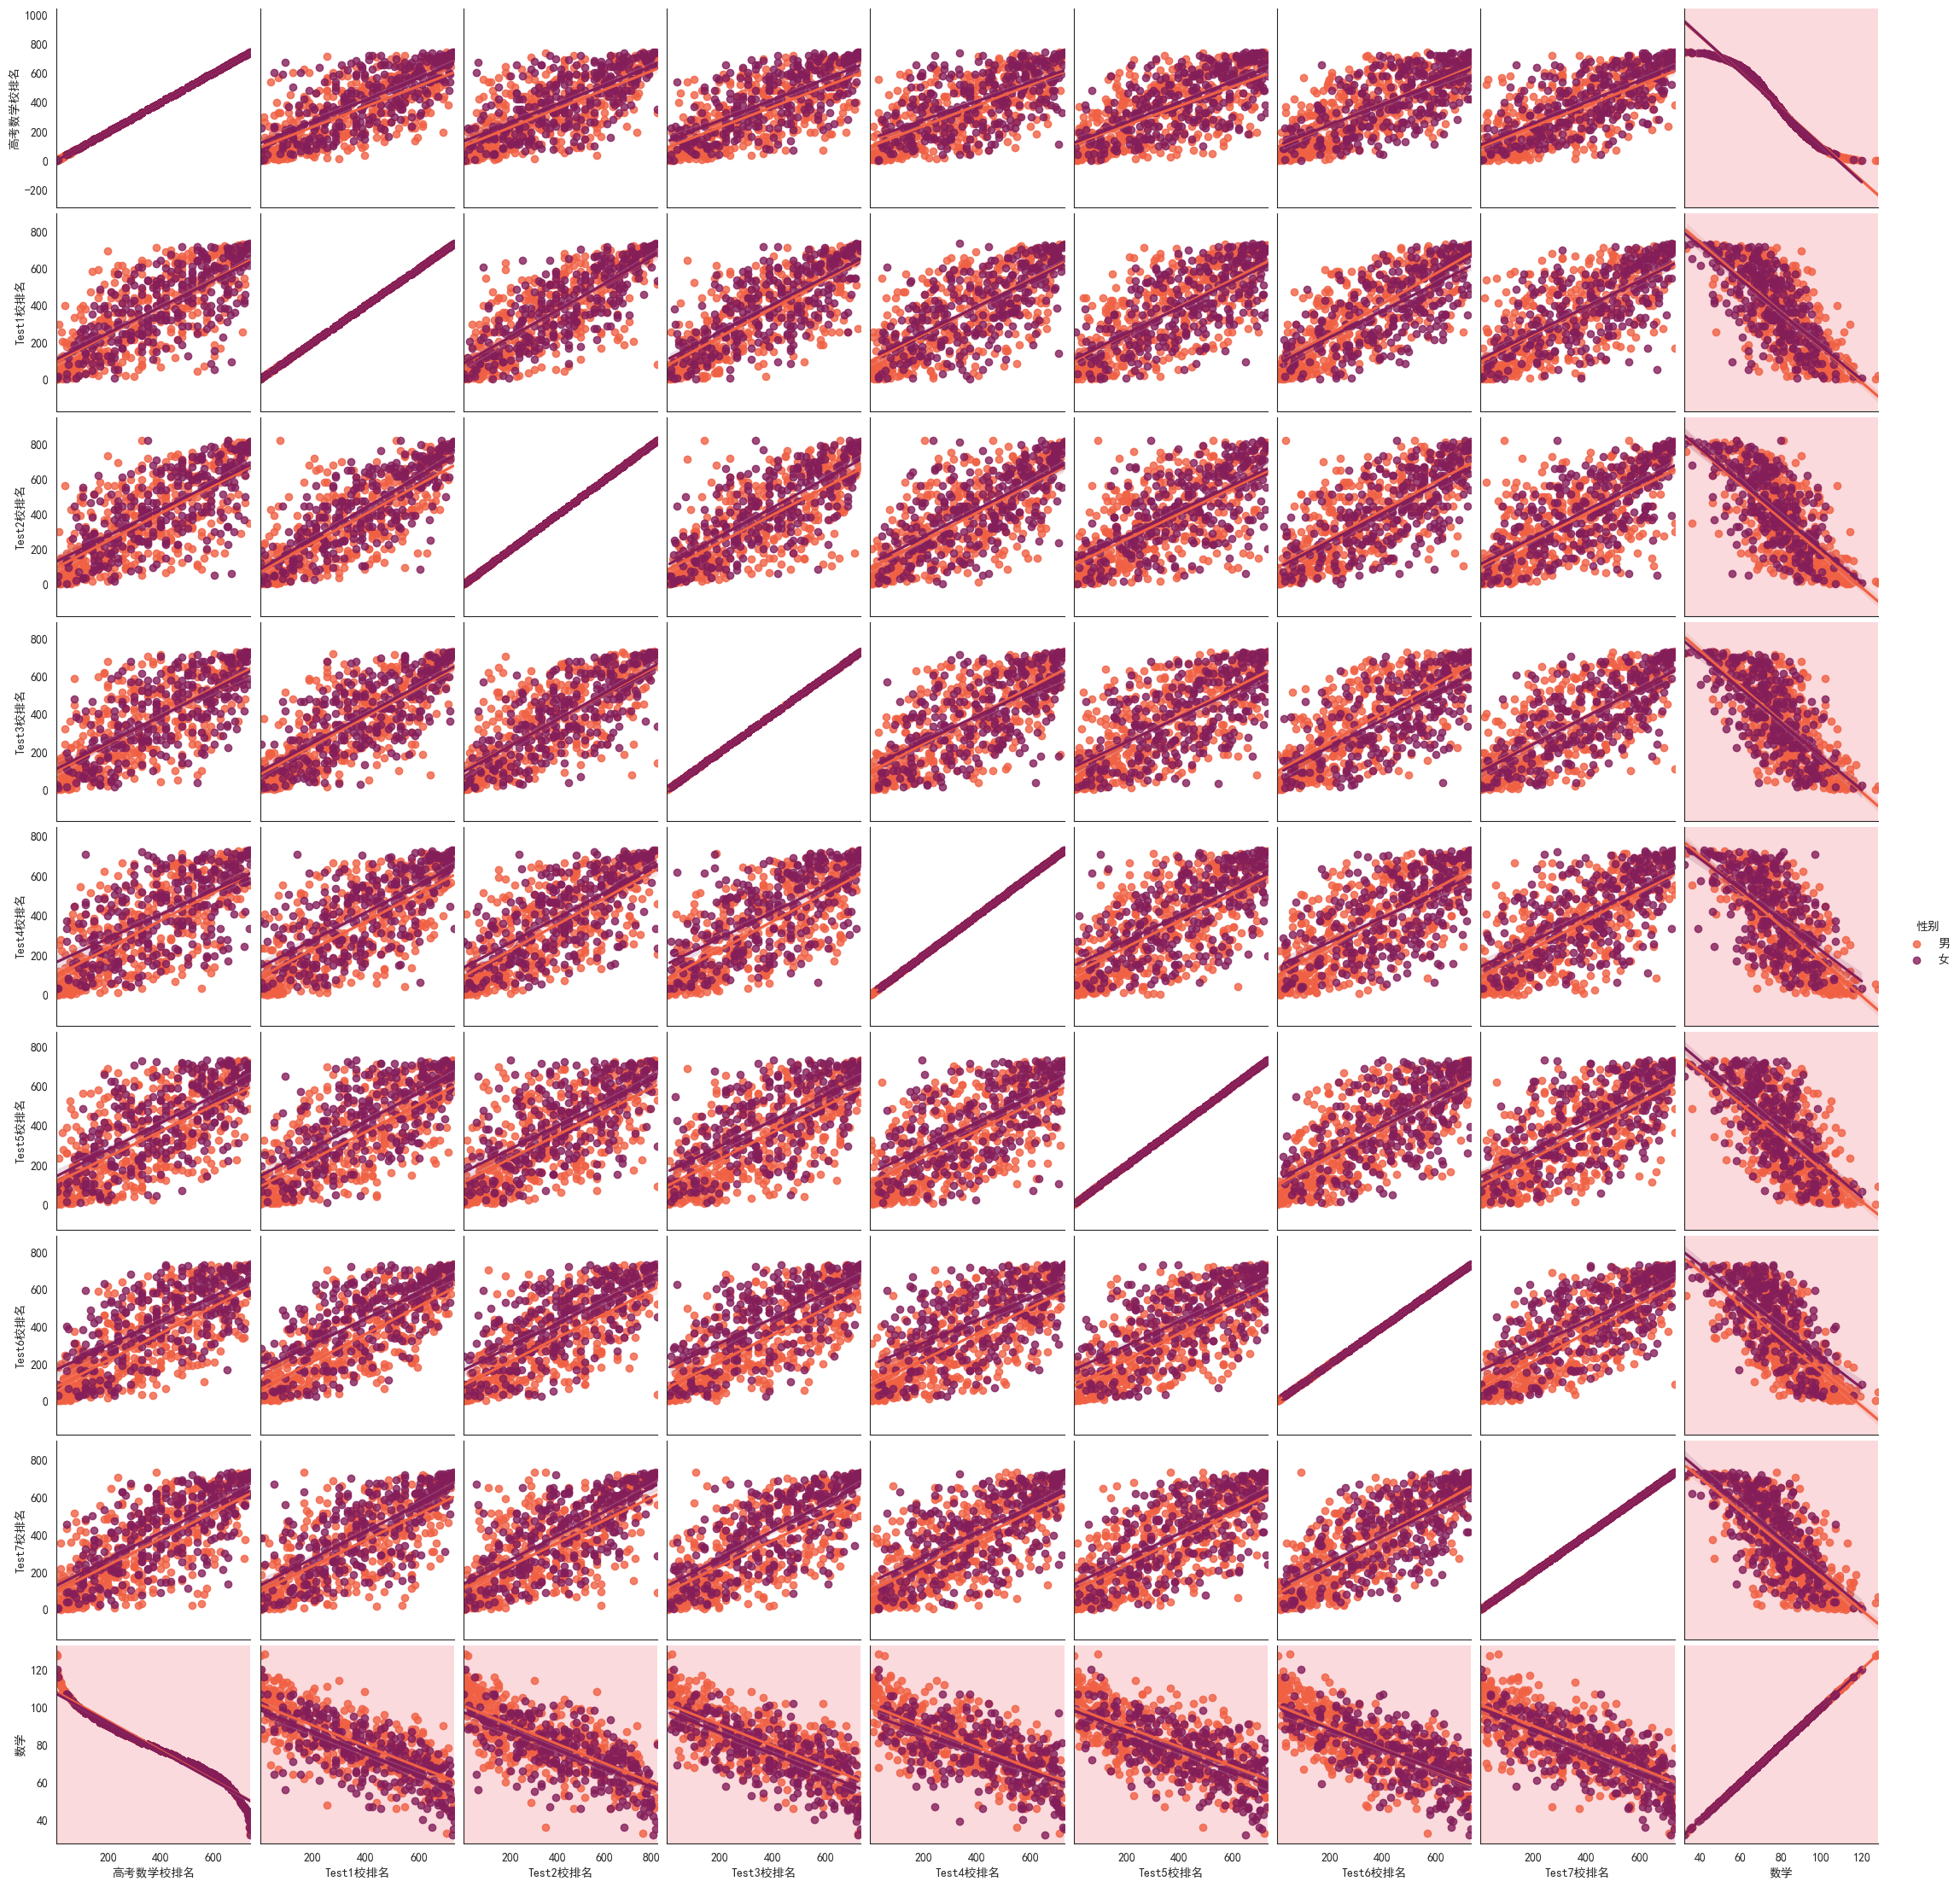

In [8]:

# 各类测试历史校排名与高考数学成绩的关系
cols1 = [col for col in gaokao_merged_df.columns if col.endswith('校排名')] + ['数学']+['性别']
# cols1.remove('高考数学校排名')
pairplot = sns.pairplot(gaokao_merged_df[cols1],hue='性别',kind="reg",diag_kind=None,palette='rocket_r')

# 获取所有的轴
axes = pairplot.axes

# 遍历所有的轴，设置含有'数学'的行和列的散点图颜色设置为红色
for i in range(len(cols1)):
    for j in range(len(cols1)):
        if cols1[i] == '数学' or cols1[j] == '数学':
            axes[i, j].set_facecolor('#FADADD')

# # 修改回归直线的颜色为红色
# for ax in axes.flatten():
#     if hasattr(ax, 'get_lines'):
#         lines = ax.get_lines()
#         if lines:
#             # 取最后一条线（回归直线）
#             line = lines[-1]
#             line.set_color('red')
# pairplot.map_lower(sns.kdeplot,levels=3) #在左下角的图上添加kde图

plt.show()


c:\Users\August\Desktop\Python\数据分析项目\成绩分析\.conda\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\August\Desktop\Python\数据分析项目\成绩分析\.conda\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\August\Desktop\Python\数据分析项目\成绩分析\.conda\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavi

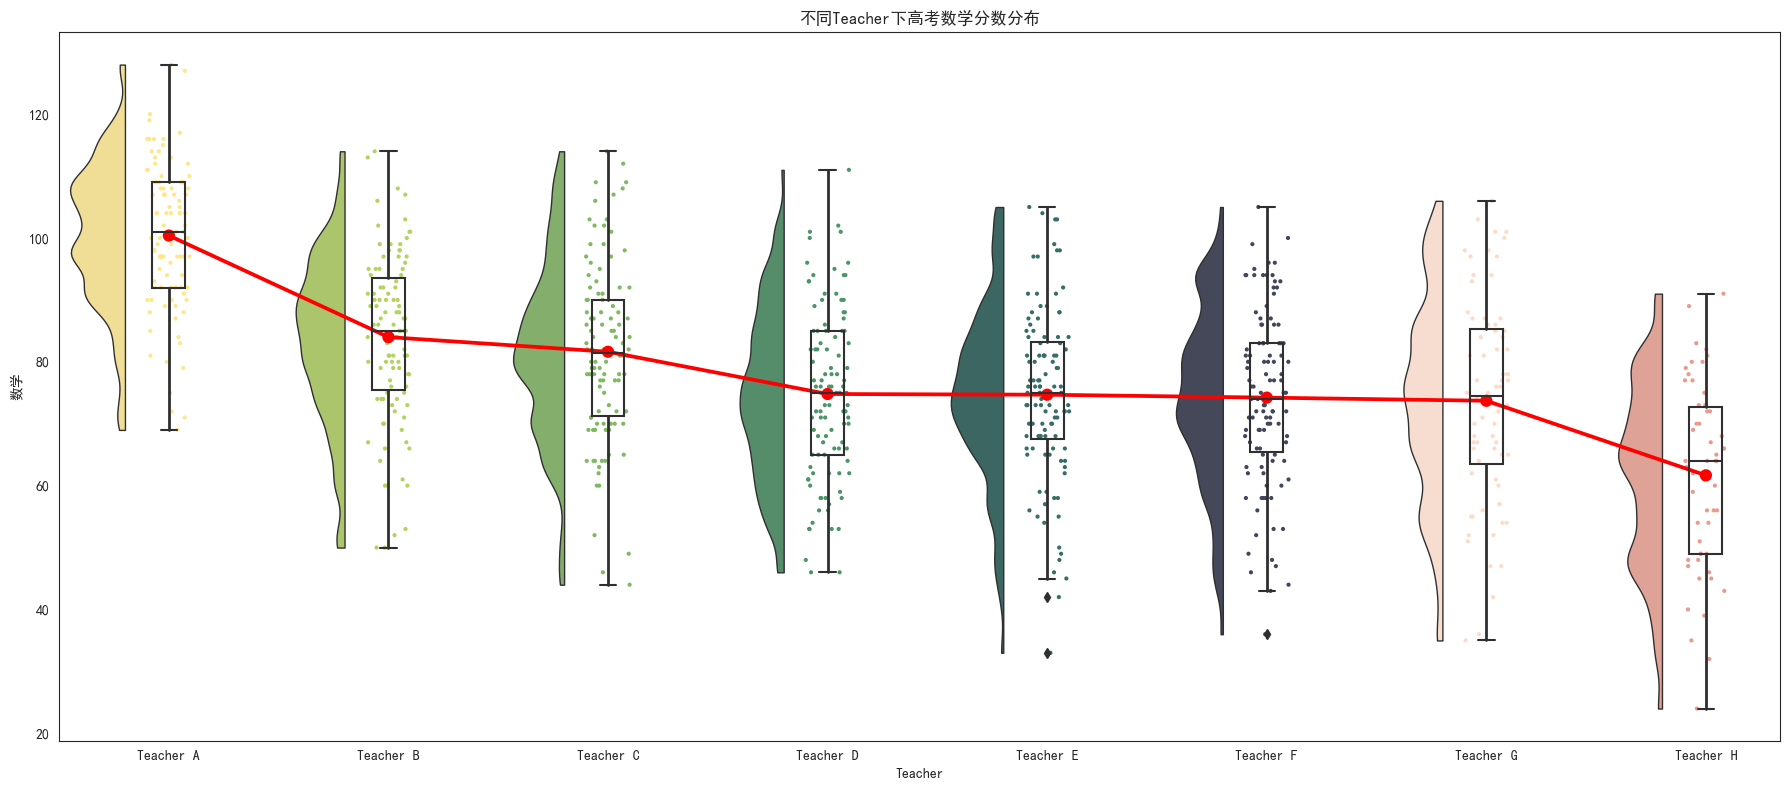

In [31]:
import ptitprince as pt
# 设置默认散点大小为10
plt.rcParams['lines.markersize'] = 100



category = 'Teacher'

# 准备数据
data = gaokao_merged_df
data[category] = data[category].astype('category')
# 自定义颜色
mycol22 = ["#eb998b", "#fddbc8", "#42465c", "#356d67", "#4c9568",
           "#7fb961", "#b0d45d", "#ffe788", "#b20000", "#f06152",
           "#7d4444", "#9e6c69", "#cca69c", "#5066a1", "#76afda",
           "#abddff", "#dcf2ff", "#e8743c", "#ffc556", "#35212e",
           "#562e3c", "#a14462"]

color2 = ["#b20000","#abddff",  "#ffc556", "#fddbc8", "#42465c"]

mycol22_inverse = mycol22[:len(list(data[category].cat.categories))][::-1]
# 去掉category中为nan的行
#data = data[data[category].notna()]
#data[category] = data[category].astype(int)

plot_choose = '横版'

if plot_choose == '竖版':
    #竖版
    f, ax = plt.subplots(figsize=(12, 30))
    # 绘制 RainCloud 图
    pt.RainCloud(
        x=category,
        y='数学',
        data=data,
        palette=mycol22_inverse,  # 使用自定义颜色
        bw=0.2,  # 选择合适的带宽
        width_viol=1,  # 小提琴图宽度
        ax=ax,  # 使用当前坐标轴
        orient='h'  # 设置方向为水平
    )
    # 反转 Y 轴
    #ax.invert_yaxis()
else:
    # 横版
    f, ax = plt.subplots(figsize=(18, 8))
    pt.RainCloud(
        x=category,
        y='数学',
        data=data,
        palette=mycol22_inverse,  # 使用自定义颜色
        bw=0.2,  # 选择合适的带宽
        width_viol=0.5,  # 小提琴图宽度
        ax=ax,  # 使用当前坐标轴
        orient='v',  # 设置方向为水平
        pointplot=True
    )
    #ax.invert_xaxis()




plt.title(f"不同{category}下高考数学分数分布")
# 调整布局以避免重叠
plt.tight_layout()
plt.show()

c:\Users\August\Desktop\Python\数据分析项目\成绩分析\.conda\lib\site-packages\seaborn\_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\August\Desktop\Python\数据分析项目\成绩分析\.conda\lib\site-packages\seaborn\_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\August\Desktop\Python\数据分析项目\成绩分析\.conda\lib\site-packages\seaborn\_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

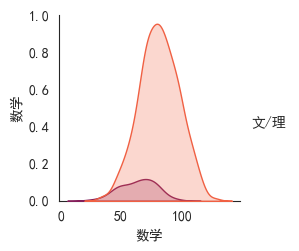

In [3]:
#不同类别的点会以不同的颜色显现出来
# 各类测试历史校排名与高考数学成绩的关系
cols2 = ['数学','Teacher','性别','初中学校','文/理']
sns.pairplot(gaokao_merged_df[cols2],hue="文/理",palette='rocket_r')

# 三、抽样函数

In [547]:
import pandas as pd

gaokao_merged_df = pd.read_excel("data/最终数据集.xlsx")

随机模拟比较方法

In [519]:
import numpy as np
# 并列展示
import matplotlib.pyplot as plt
import matplotlib as mpl
# 设置字体以支持中文显示
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
mpl.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题
import random


def simulate_K_method(sample_method, data, f, K=10):
    y_list = []
    for _ in range(K):
        y_list.append(sample_method(data, f))
    y_mean = np.nanmean(y_list)
    y_var = np.nanvar(y_list)
    return y_list, y_mean, y_var

def simulate_f_method(sample_method,method_name, data ,K=1000):
    color_dict = {
        "简单随机抽样（不放回）": "#356d67",
        "简单随机抽样（放回）": "#4c9568",
        "简单随机抽样比估计": "#7fb961",
        "简单随机抽样回归估计": "#b0d45d",
        "分层简单估计":"#ffe788",
        "分层比估计":"#e8743c",
        "分层回归估计":"#ffc76b",
        "不等概率抽样（PPS）":"#cca69c",
        "不等概率抽样（πPS）":"#eb998b",
        "系统抽样":"#5066a1",
        "整群抽样（二阶段）":"#7d4444"
    }
    f_list = np.arange(0.05, 0.55, 0.05)
    results = []
    for f in f_list:
        y_list, y_mean, y_var = simulate_K_method(sample_method, data, f,K)
        results.append((f, y_list, y_mean, y_var))
    
    color = color_dict[method_name]
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    n = len(data)
    n_list = [int(n*f) for f in f_list]
    print([result[2] for result in results])
    print([result[3] for result in results])
    # 自定义均值的样式
    meanprops = dict(marker='o', markerfacecolor='#CC011F', markeredgecolor='black', markersize=5)

    # 绘制不同f下（作为横坐标）的箱线图
    box_widths = 0.5 * (f_list[1] - f_list[0]) * n  # 自动调整箱线图宽度
    axes[0].grid(True)
    cleaned_results = [np.array(result[1])[~np.isnan(result[1])] for result in results]
    axes[0].boxplot(cleaned_results, positions=n_list, patch_artist=True,
                boxprops=dict(facecolor=color, color=color),
                medianprops=dict(color='black'), widths=box_widths, showmeans=True, meanprops=meanprops)
    # 添加真值水平线 和 均值的点
    true_y_mean = data['数学'].mean()
    axes[0].axhline(true_y_mean, color='red', linestyle='--', label='True Mean')
    
    axes[0].legend()
    axes[0].set_xticks(n_list)
    axes[0].set_xlabel('样本量 (n)')
    axes[0].set_ylabel('估计值')
    axes[0].set_title(f'随机模拟{K}次估计箱线图{method_name}')


    # 绘制不同f下的方差柱状图
    v_srs_list = []
    for f,n in zip(f_list,n_list):
        v_srs_list.append(np.nanvar(data['数学'])/n*(1-f))
    bar_width = 0.8 * (f_list[1] - f_list[0]) * n  # 自动调整柱状图宽度
    axes[1].grid(True)
    axes[1].bar(n_list, [result[3] for result in results], color=color, alpha=1, width=box_widths, zorder=3)
    axes[1].plot(n_list, [result[3] / v_srs for result, v_srs in zip(results, v_srs_list)], color='#CC011F', linestyle='--', linewidth=1.5, zorder=5, label='设计效应 deff')
    axes[1].scatter(n_list, [result[3] / v_srs for result, v_srs in zip(results, v_srs_list)], 
                color='#CC011F', edgecolors='black', marker='o', s=12, zorder=6)
    axes[1].legend()
    axes[1].set_xlabel('样本量 (n)')
    axes[1].set_xticks(n_list)
    #axes[1].set_xticklabels(n_list, rotation=45, ha='right')
    axes[1].set_ylabel(f'{K}次估计方差')
    axes[1].set_title(f'随机模拟{K}次估计方差 {method_name}')
    

    plt.tight_layout()
    plt.show()

# 示例
# simulate_f_method(srswr_sample,"简单随机抽样（不放回）", gaokao_merged_df)


## 1、简单随机抽样

### 不放回抽样

真实总体均值 79.23638778220452 简单随机抽样估计 81.52475247524752
[79.07427027027026, 79.33934666666667, 79.27701785714285, 79.16526666666667, 79.26064893617021, 79.20274666666667, 79.23060076045627, 79.2421196013289, 79.23081360946746, 79.23348138297874]
[7.359329799853908, 3.5868738842666668, 2.1549034856505105, 1.4661259511111109, 1.2007171230194658, 0.9056050977975313, 0.724901705908716, 0.6016430626152031, 0.4788521303088128, 0.4001669058326732]


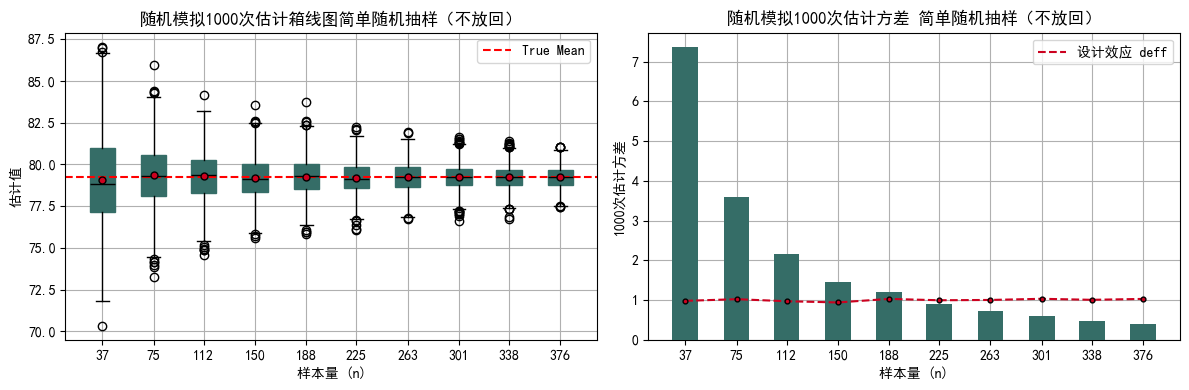

In [524]:
import random 
def srswr_sample(data,f):
    n = len(data)
    index = random.sample(range(n),int(n*f))
    # print(int(n*f))
    return data.iloc[index]['数学'].mean()
# test
f = 0.135
print("真实总体均值",gaokao_merged_df['数学'].mean(),"简单随机抽样估计",srswr_sample(gaokao_merged_df,f))
simulate_f_method(srswr_sample,"简单随机抽样（不放回）", gaokao_merged_df,K=1000)


### 放回抽样

In [536]:
def srswor_sample(data,f):
    n = len(data)
    index = [random.randint(0, n-1) for _ in range(int(n*f))]
    return data.iloc[index]['数学'].mean()

# 示例
f = 0.135
print("真实总体均值", gaokao_merged_df['数学'].mean(), "简单随机放回抽样估计", srswor_sample(gaokao_merged_df, f))
# simulate_f_method(srswor_sample,"简单随机抽样（放回）", gaokao_merged_df,K=1000)


真实总体均值 79.23638778220452 简单随机放回抽样估计 78.18811881188118


### 比估计与回归估计

In [526]:

def ratio_sample(data,f):
    n = len(data)
    index = random.sample(range(n),int(n*f))
    return data.iloc[index]['数学'].mean()/data.iloc[index]['Test7成绩'].mean()*data['Test7成绩'].mean()
    
# 示例
f = 0.135
print("真实总体均值", gaokao_merged_df['数学'].mean(), "比估计", ratio_sample(gaokao_merged_df,f))
# simulate_f_method(ratio_sample,"简单随机抽样比估计", gaokao_merged_df)


真实总体均值 79.23638778220452 比估计 79.79810752140423


In [527]:
def regress_sample(data, f):
    n = len(data)
    index = random.sample(range(n),int(n*f))
    y = data.iloc[index]['数学']
    x = data.iloc[index]['Test1成绩']
    X_mean = data[f'Test1成绩'].mean()
    syx = np.sum((x - x.mean()) * (y - y.mean()))
    sx2 = np.sum((x - x.mean()) ** 2)
    b = syx / sx2

    # Y = data['数学']
    # X = data['Test1成绩']
    # SYX = np.sum((X - X.mean()) * (Y - Y.mean()))
    # SX2 = np.sum((X - X.mean()) ** 2)
    # beta = SYX / SX2

    ylr = y.mean() + b * (X_mean - x.mean())
    return ylr

# 示例
f = 0.135
print("真实总体均值", gaokao_merged_df['数学'].mean(), "回归估计", regress_sample(gaokao_merged_df, f))
# simulate_f_method(regress_sample,"简单随机抽样回归估计", gaokao_merged_df)


真实总体均值 79.23638778220452 回归估计 79.00724699893804


In [528]:
from sklearn.linear_model import Lasso

def multi_regress_sample(data, f):
    n = len(data)
    index = random.sample(range(n), int(n * f))
    y = data.iloc[index]['数学']
    
    # 提取多个自变量
    X = data.iloc[index][['Test1成绩', 'Test2成绩', 'Test3成绩', 'Test4成绩', 'Test5成绩', 'Test6成绩', 'Test7成绩']]
    # 将缺失值填充为平均值
    X = X.fillna(X.mean())
    X_mean = data[['Test1成绩', 'Test2成绩', 'Test3成绩', 'Test4成绩', 'Test5成绩', 'Test6成绩', 'Test7成绩']].mean()
    
    # 使用Lasso回归
    lasso = Lasso(alpha=0.1)
    lasso.fit(X, y)
    # 打印各变量系数
    # print(lasso.coef_)
    # 计算回归估计
    ylr = y.mean() + np.dot(lasso.coef_, (X_mean - X.mean()))
    return ylr

# 示例
f = 0.135
print("真实总体均值", gaokao_merged_df['数学'].mean(), "Lasso回归估计", multi_regress_sample(gaokao_merged_df, f))
# simulate_f_method(multi_regress_sample, "简单随机抽样回归估计", gaokao_merged_df)


真实总体均值 79.23638778220452 Lasso回归估计 78.5950495753483


## 2、分层抽样

### 简单估计

In [529]:
def stratified_sample(data, f):
    N = len(data)
    n = int(N * f)
    # 按班级分组
    grouped = data.groupby('班级')
    # 计算每个班级的样本量
    WS = grouped['数学'].std() * grouped.size()
    sample_sizes = (WS / WS.sum() * n).round().astype(int)

    current_n = n - sample_sizes.sum()
    # 将sample_sizes降序排列，依次分配剩余样本量
    sample_sizes = sample_sizes.sort_values(ascending=False)
    for i in range(len(sample_sizes)):
        if current_n != 0:
            sample_sizes.iloc[i] += 1
            current_n -= 1
        else:
            break
    # 初始化一个空的 DataFrame 来存储样本
    sampled_data = pd.DataFrame()
    yst = 0
    # print(sample_sizes)
    group_sizes = grouped.size()
    # 对每个班级进行抽样
    for name, group in grouped:
        sample = group.sample(n=sample_sizes[name])
        sampled_data = pd.concat([sampled_data, sample])
        yst += sample['数学'].mean() * group_sizes[name] / N
    # 返回抽样后的数据的数学均值
    return yst

# 示例
f = 0.135
print("真实总体均值", gaokao_merged_df['数学'].mean(), "分层抽样", stratified_sample(gaokao_merged_df, f))
# simulate_f_method(stratified_sample,"分层简单估计", gaokao_merged_df)

真实总体均值 79.23638778220452 分层抽样 79.23168384662411


### 比估计与回归估计

In [530]:
def strat_ratio_sample(data,f):
    N = len(data)
    n = int(N * f)
    # 按班级分组
    grouped = data.groupby('班级')
    # 计算每个班级的样本量
    WS = grouped['数学'].std() * grouped.size()
    sample_sizes = (WS / WS.sum() * n).round().astype(int)

    current_n = n - sample_sizes.sum()
    # 将sample_sizes降序排列，依次分配剩余样本量
    sample_sizes = sample_sizes.sort_values(ascending=False)
    for i in range(len(sample_sizes)):
        if current_n != 0:
            sample_sizes.iloc[i] += 1
            current_n -= 1
        else:
            break
    # 初始化一个空的 DataFrame 来存储样本
    sampled_data = pd.DataFrame()
    xst, Xst,yst = 0,0,0
    group_sizes = grouped.size()
    # 对每个班级进行抽样
    for name, group in grouped:
        sample = group.sample(n=sample_sizes[name])
        sampled_data = pd.concat([sampled_data, sample])
        yst += sample['数学'].mean() * group_sizes[name] / N
        xst += sample['Test7成绩'].mean() * group_sizes[name] / N
        Xst += group['Test7成绩'].mean() * group_sizes[name] / N
    return yst/xst*Xst
# 示例
f = 0.135
print("真实总体均值", gaokao_merged_df['数学'].mean(), "分层比估计",strat_ratio_sample(gaokao_merged_df,f))
# simulate_f_method(strat_ratio_sample,"分层比估计", gaokao_merged_df,K=1000)

真实总体均值 79.23638778220452 分层比估计 79.08520003962138


In [531]:
def strat_res_sample(data,f):
    N = len(data)
    n = int(N * f)
    # 按班级分组
    grouped = data.groupby('班级')
    # 计算每个班级的样本量
    WS = grouped['数学'].std() * grouped.size()
    sample_sizes = (WS / WS.sum() * n).round().astype(int)

    current_n = n - sample_sizes.sum()
    # 将sample_sizes降序排列，依次分配剩余样本量
    sample_sizes = sample_sizes.sort_values(ascending=False)
    for i in range(len(sample_sizes)):
        if current_n != 0:
            sample_sizes.iloc[i] += 1
            current_n -= 1
        else:
            break
    # 初始化一个空的 DataFrame 来存储样本
    sampled_data = pd.DataFrame()
    xst, Xst, yst = 0,0,0
    up,down = 0,0
    group_sizes = grouped.size()
    # 对每个班级进行抽样
    for name, group in grouped:
        sample = group.sample(n=sample_sizes[name])
        sampled_data = pd.concat([sampled_data, sample])
        Wh = group_sizes[name] / N
        fh = sample.shape[0] / group.shape[0]
        yst += sample['数学'].mean() * Wh
        xst += sample['Test7成绩'].mean() * Wh
        Xst += group['Test7成绩'].mean() * Wh
        y,x = sample['数学'],sample['Test7成绩']
        syx = np.sum((x - x.mean()) * (y - y.mean()))
        sx2 = np.sum((x - x.mean()) ** 2)
        up += (Wh)**2*(1-fh)*syx/sample.shape[0]
        down += (Wh)**2*(1-fh)*sx2/sample.shape[0]

    b = up / down
    ystlr = yst + b * (Xst - xst)
    return ystlr
# 示例
f = 0.135
print("真实总体均值", gaokao_merged_df['数学'].mean(), "分层回归估计",strat_res_sample(gaokao_merged_df,f))
# simulate_f_method(strat_res_sample,"分层回归估计", gaokao_merged_df,K=1000)
#simulate_K_method(strat_res_sample, gaokao_merged_df,f)

真实总体均值 79.23638778220452 分层回归估计 80.3784715905279


## 3、不等概率抽样

In [532]:
def PPS_sample(data, f):
    N = len(data)
    data['Test7成绩'] = data['Test7成绩'].fillna(data['Test7成绩'].mean())
    data["入样概率Z"] = data['Test7成绩'] / data['Test7成绩'].sum()
    n = int(len(data) * f)
    index = np.random.choice(data.index, n, p=data['入样概率Z'])
    sample = data.loc[index]
    yHH = sum(sample['数学'] / sample['入样概率Z']) / n / N
    return yHH

# 示例
f = 0.135
print("真实总体均值", gaokao_merged_df['数学'].mean(), "不等概率抽样（PPS）", PPS_sample(gaokao_merged_df, f))
# simulate_f_method(PPS_sample, "不等概率抽样（PPS）", gaokao_merged_df, K=5000)

真实总体均值 79.23638778220452 不等概率抽样（PPS） 79.10660706706079


In [533]:
# Brewer Method
def piPS_sample(data, f):
    N = len(data)
    n = int(len(data) * f)
    data['Test7成绩'] = data['Test7成绩'].fillna(data['Test7成绩'].mean())
    data["Z"] = data['Test7成绩'] / data['Test7成绩'].sum()
    data['入样概率'] = data["Z"] * (1 - data["Z"]) / (1 - n * data["Z"])
    sampled_data = pd.DataFrame()
    sample1 = data.sample(1, weights='入样概率')
    data = data.drop(sample1.index)
    sampled_data = pd.concat([sampled_data, sample1])
    r = 1
    while r < n:
        r += 1
        data['入样概率'] = data["Z"] * (1 - data["Z"]) / (1 - (n - r + 1) * data["Z"])
        sample = data.sample(1, weights='入样概率')
        sampled_data = pd.concat([sampled_data, sample])
        data = data.drop(sample.index)
        

    yHT = sum(sampled_data['数学'] / (n * sampled_data['Z'])) / N
    return yHT

# 示例
f = 0.135
print("真实总体均值", gaokao_merged_df['数学'].mean(), "不等概率抽样（πPS）", piPS_sample(gaokao_merged_df, f))
# simulate_f_method(piPS_sample, "不等概率抽样（πPS）", gaokao_merged_df, K=1000)

真实总体均值 79.23638778220452 不等概率抽样（πPS） 77.75199350390416


## 4、整群抽样（二阶段）

真实总体均值 79.23638778220452 整群抽样估计 78.48849928419193
[79.25948056033332, 79.23458078032382, 79.25765177024971, 79.232444145457, 79.17722623774067, 79.18409031705457, 79.100981996695, 79.2785027833527, 79.2106643510224, 79.28047588452203]
[1.5017617208399003, 1.4246179544945081, 1.4188555029160481, 1.4505410477761351, 1.5943109790137378, 1.4980427575412396, 1.3861131976392935, 1.516592693828239, 1.4730614159782944, 1.4710048670253442]


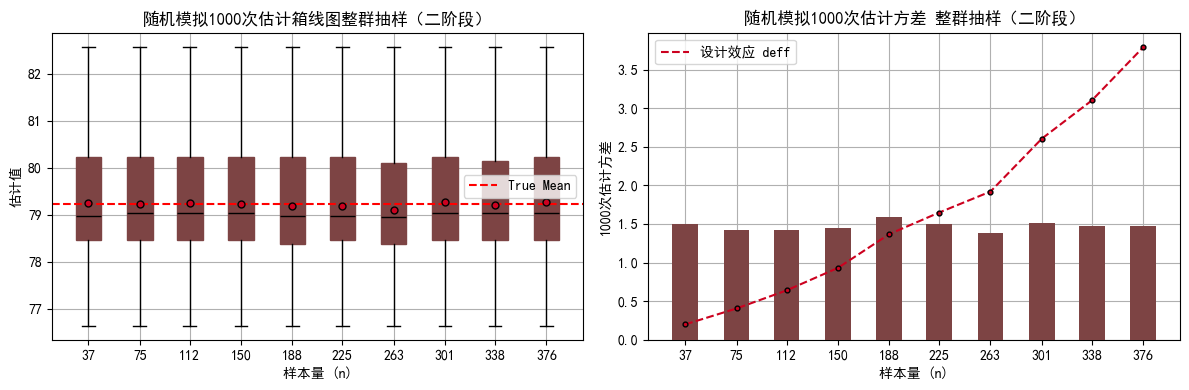

In [521]:
def cluster_sampling(data, f):
    N = len(data)
    n = int(N * f)
    cl = 4
    n_list = []
    i = cl
    while i != 0:
        n1 = n // i
        n_list.append(n1)
        n -= n1
        i -= 1
    #print(n_list)

    
    # 按Teacher分群
    grouped = data.groupby('Teacher')
    
    # 生成按群分类的数据cluster_data
    cluster_data = grouped['Test7成绩'].agg(['mean', 'sum','size']).reset_index()
    cluster_data.columns = ['Teacher', '群均值', '群总量','群规模']
    cluster_data['高考数学均值'] = grouped['数学'].mean()

    # 归一化群均值作为Z
    cluster_data['Z'] = cluster_data['群总量'] / cluster_data['群总量'].sum()
    
    # print(cluster_data)
    # 按照piPS抽取三个群
    cluster_copy = cluster_data.copy()
    cluster_copy['入样概率'] = cluster_copy["Z"] * (1 - cluster_copy["Z"]) / (1 - cl * cluster_copy["Z"])
    sampled_clusters = pd.DataFrame()
    sample1 = cluster_copy.sample(1, weights='入样概率')
    cluster_copy = cluster_copy.drop(sample1.index)
    sampled_clusters = pd.concat([sampled_clusters, sample1])
    r = 1
    while r < cl:
        r += 1
        cluster_copy['入样概率'] = cluster_copy["Z"] * (1 - cluster_copy["Z"]) / (1 - (cl - r + 1) * cluster_copy["Z"])
        sample = cluster_copy.sample(1, weights='入样概率')
        sampled_clusters = pd.concat([sampled_clusters, sample])
        cluster_copy = cluster_copy.drop(sample.index)


    # print(sampled_clusters['群总量'].sum()/sampled_clusters['群规模'].sum())

    # 在每个群里简单抽取ni个样本
    id = 0
    for i, cluster in sampled_clusters.iterrows():
        cluster_students = data[data['Teacher'] == cluster['Teacher']]
        sample_size = min(n_list[id], len(cluster_students))
        # print(cluster['Teacher'], sample_size)
        sampled_clusters.loc[sampled_clusters['Teacher'] == cluster['Teacher'], '数学总量'] = 0
        sample = cluster_students.sample(sample_size)
        sampled_clusters.loc[sampled_clusters['Teacher'] == cluster['Teacher'], '数学总量'] = sample['数学'].mean()*cluster_data['群规模']
        sampled_clusters.loc[sampled_clusters['Teacher'] == cluster['Teacher'], '真实数学总量'] = cluster_students['数学'].sum()
        id+=1
    
    # 计算YHT
    #print(sampled_clusters)
    YHT = (sampled_clusters['真实数学总量'] / sampled_clusters['Z']).mean()
    return YHT/N

# 示例
f = 0.135
print("真实总体均值", gaokao_merged_df['数学'].mean(), "整群抽样估计", cluster_sampling(gaokao_merged_df, f))
simulate_f_method(cluster_sampling, "整群抽样（二阶段）", gaokao_merged_df, K=1000)

## 5、系统抽样

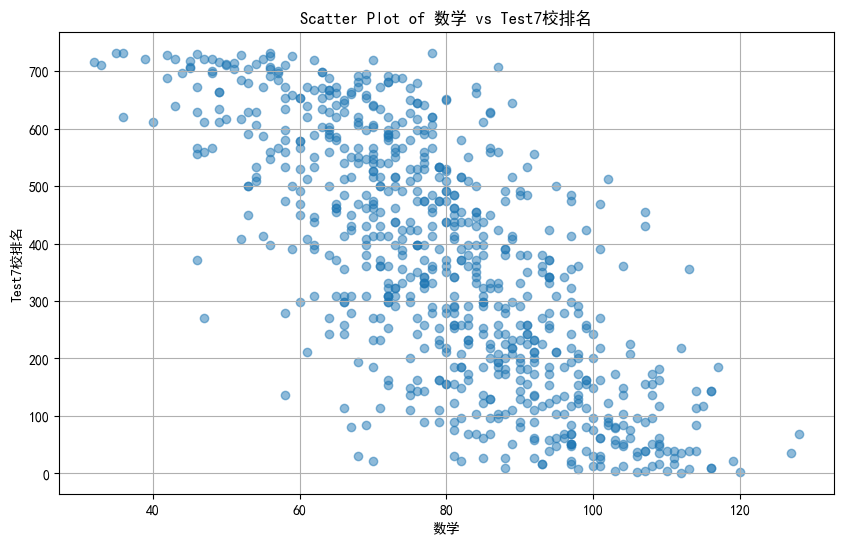

In [3]:
import matplotlib.pyplot as plt

# 画出gaokao_merged_df['数学']和gaokao_merged_df['Test6校排名']的散点图
plt.figure(figsize=(10, 6))
plt.scatter(gaokao_merged_df['数学'], gaokao_merged_df['Test7校排名'], alpha=0.5)
plt.xlabel('数学')
plt.ylabel('Test7校排名')
plt.title('Scatter Plot of 数学 vs Test7校排名')
plt.grid(True)
plt.show()


真实总体均值 79.23638778220452 系统抽样 83.36882129277566
[79.19686486486485, 79.24346666666668, 79.260875, 79.24957333333332, 79.25928723404255, 79.23230222222222, 79.1837566539924, 79.47661129568107, 79.23736686390534, 79.24316489361702]
[2.670547365960557, 0.9310230044444441, 2.236973411670918, 0.41689857351111176, 0.2204338355590766, 1.898795697303703, 12.288968069742227, 5.860796949261045, 1.6374578367354093, 0.10777521715142584]


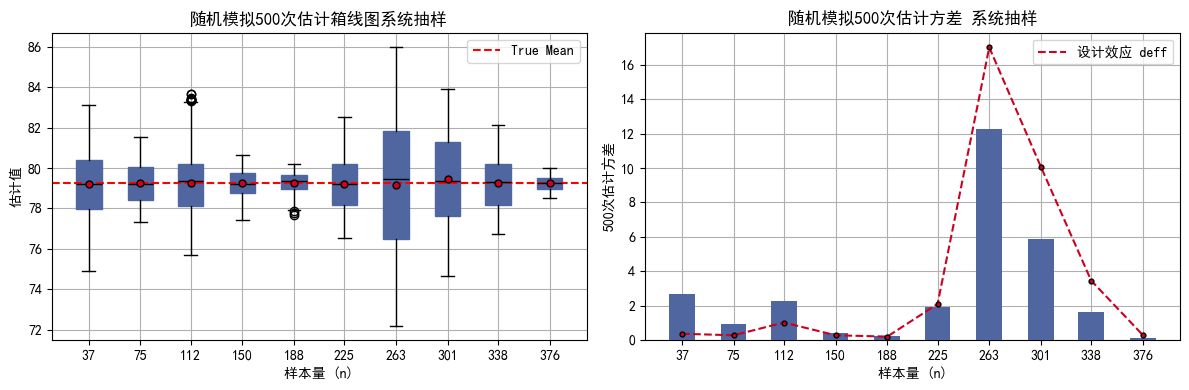

In [15]:
def system_sample(data, f):
    data['Test7校排名'] = data['Test7成绩'].rank(ascending=False, method='first')
    # 将data按Test6校排名排序
    data = data.sort_values(by='Test7校排名')
    # 相应将索引重置为Test6校排名
    data = data.reset_index(drop=True)

    N = len(data)
    n = int(N * f)
    k = round(N / n)
    # k = np.ceil(N / n).astype(int)
    k = N//n
    # k = max(10,k)
    # print(N, n, k)
    r = np.random.randint(1, N+1)
    # r = N//2 + np.random.randint(1, k+1)
    sample_data = pd.DataFrame()
    rank = []
    for j in range(1, n + 1):
        idx = r + k * (j - 1)
        if idx != N:
            rank.append((r + k * (j - 1)) % N -1)
        else:
            rank.append(r + k * (j - 1) -1)
    sample_data = data.iloc[rank]
    # print(k)
    # print(sample_data['Test6校排名'])

    return sample_data['数学'].mean()

# 示例
f = 0.35
print("真实总体均值", gaokao_merged_df['数学'].mean(), "系统抽样", system_sample(gaokao_merged_df, f))
simulate_f_method(system_sample, "系统抽样", gaokao_merged_df, K=500)

真实总体均值 79.23638778220452 系统抽样 80.07375283446713
[82.4011621832296, 81.48239282163958, 80.78339228315264, 80.56703946261426, 80.54404962782291, 79.8902972050291, 79.89872676911828, 79.84745910048903]
[114.2153208332299, 0.6284057927245303, 0.4877800816314019, 29.559472770883193, 173.59538264373128, 61.99421070376772, 12.583186117647355, 0.12494076507562013]


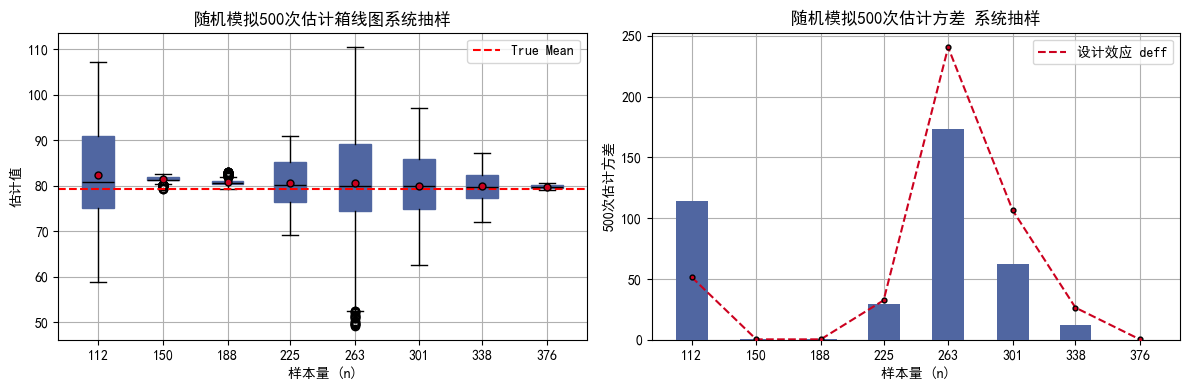

In [ ]:
def system_sample1(data, f):
    # 丢弃缺失值
    data = data.dropna(subset=['Test7成绩'])
    data.loc[:, 'Test7校排名'] = data['Test7成绩'].rank(ascending=False, method='first')
    # 将data按Test7校排名排序
    data = data.sort_values(by='Test7校排名')
    # 相应将索引重置为Test7校排名
    data = data.reset_index(drop=True)
    
    N = len(data)
    n = int(N * f)
    k = N // n
    r = np.random.randint(1, N + 1)

    sample_data = pd.DataFrame()
    rank = []
    for j in range(1, n + 1):
        idx = r + k * (j - 1)
        if idx != N:
            rank.append((r + k * (j - 1)) % N - 1)
        else:
            rank.append(r + k * (j - 1) - 1)
    sample_data = data.iloc[rank]

    # 首尾矫正法
    if r + (n - 1) * k <= N:
        w1 = 1 / n + (2 * r + (n - 1) * k - (N + 1)) / (2 * (n - 1) * k)
        w2 = 1 / n - (2 * r + (n - 1) * k - (N + 1)) / (2 * (n - 1) * k)
    else:
        n2 = ((r + (n - 1) * k ) - N) // k
        # print(r + (n - 1) * k , n2)
        w1 = 1 / n + (2 * r + (n - 1) * k - (N + 1) - 2 * n2 * N / n) / (2 * (n - k))
        #print((2 * r + (n - 1) * k - (N + 1) - 2 * n2 * N / n))
        w2 = 1 / n - (2 * r + (n - 1) * k - (N + 1) - 2 * n2 * N / n) / (2 * (n - k))

    weights = [1 / n] * n
    weights[0] = w1
    weights[-1] = w2
    # print(weights)
    sample_data = sample_data.sort_values(by='Test7校排名', inplace=False)
    # print(sample_data[['Test7校排名','数学']])
    weighted_mean = sum(sample_data['数学'] * weights) #/ sum(weights)
    #print(sample_data['数学'].mean())
    return weighted_mean

# 示例
f = 0.6
print("真实总体均值", gaokao_merged_df['数学'].mean(), "系统抽样", system_sample1(gaokao_merged_df, f))
simulate_f_method(system_sample1, "系统抽样", gaokao_merged_df, K=500)

In [399]:
-45%50

5

In [534]:
def system_sample2(data, f):
    # 丢弃缺失值
    # data = data.dropna(subset=['Test7成绩'])
    data.loc[:, 'Test7校排名'] = data['Test7成绩'].rank(ascending=False, method='first')
    # 将data按Test7校排名排序
    data = data.sort_values(by='Test7校排名')
    # 相应将索引重置为Test7校排名
    data = data.reset_index(drop=True)
    
    N = len(data) - len(data)%2
    n = int(N * f) - int(N * f) % 2
    k = N // n
    # print(N, n, k)
    half_N = N // 2
    half_n = n // 2
    r1 = np.random.randint(1, half_N + 1)
    r2 = np.random.randint(half_N + 1, N + 1)
    r2 = N - r1
    sample_data = pd.DataFrame()
    rank = []
    for j in range(1, half_n + 1):
        idx1 = r1 + k * (j - 1)
        idx2 = r2 - k * (j - 1)
        if idx1 != half_N:
            rank.append(idx1 % half_N - 1)
            rank.append(N + 1 - idx1 % half_N - 1)
        else:
            rank.append(idx1 - 1)
            rank.append(N + 1 - idx1 - 1)
        
        # if idx2 < half_N:
        #     rank.append(N + 1 - idx2 % half_N - 1)
        # elif idx2 == half_N:
        #     rank.append(N - 1)
        # else:
        #     rank.append(idx2 - 1)
 

    sample_data = data.iloc[rank]
    # print(rank)
    # print(sample_data['Test7校排名'])
    return sample_data['数学'].mean()

# 示例
f = 0.4
print("真实总体均值", gaokao_merged_df['数学'].mean(), "系统抽样", system_sample2(gaokao_merged_df, f))
# simulate_f_method(system_sample2, "系统抽样", gaokao_merged_df, K=1000)

真实总体均值 79.23638778220452 系统抽样 78.87333333333333


## 总结：方法合集

C:\Users\August\AppData\Local\Temp\ipykernel_21060\951381424.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bias_df['y_mean'] = pd.to_numeric(bias_df['y_mean'], errors='coerce')


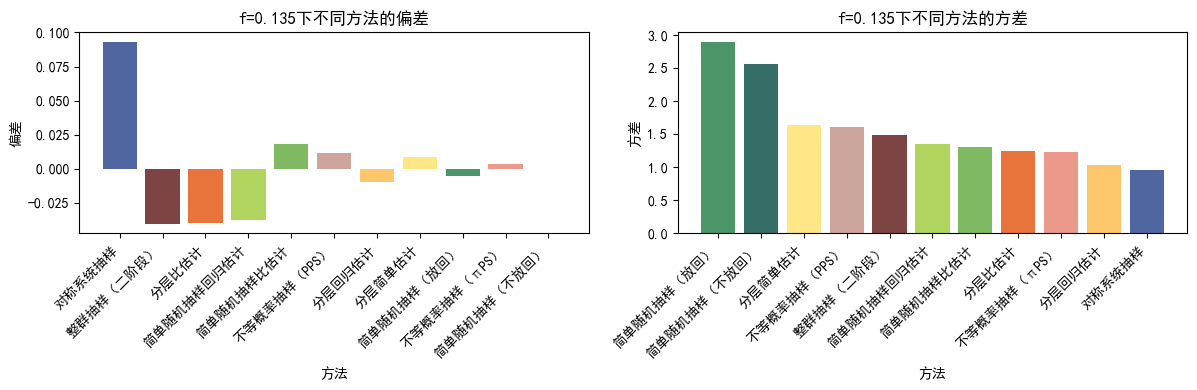

In [539]:
sample_method = [srswr_sample,srswor_sample,ratio_sample,regress_sample,stratified_sample,strat_ratio_sample,strat_res_sample,PPS_sample,piPS_sample,cluster_sampling,system_sample2]
method_name = [
        "简单随机抽样（不放回）",
        "简单随机抽样（放回）",
        "简单随机抽样比估计",
        "简单随机抽样回归估计",
        "分层简单估计",
        "分层比估计",
        "分层回归估计",
        "不等概率抽样（PPS）",
        "不等概率抽样（πPS）",
        "整群抽样（二阶段）",
        "对称系统抽样"]
color_dict = {
        "简单随机抽样（不放回）": "#356d67",
        "简单随机抽样（放回）": "#4c9568",
        "简单随机抽样比估计": "#7fb961",
        "简单随机抽样回归估计": "#b0d45d",
        "分层简单估计":"#ffe788",
        "分层比估计":"#e8743c",
        "分层回归估计":"#ffc76b",
        "不等概率抽样（PPS）":"#cca69c",
        "不等概率抽样（πPS）":"#eb998b",
        "对称系统抽样":"#5066a1",
        "整群抽样（二阶段）":"#7d4444"
    }
f = 0.135
results = []
for i,method in enumerate(sample_method):
    y_list, y_mean, y_var = simulate_K_method(method, gaokao_merged_df, f, K=1000)
    results.append([method_name[i],y_mean,y_var])
results = pd.DataFrame(results,columns=['method','y_mean','y_var'])

# 绘图
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
true_value = np.mean(gaokao_merged_df['数学'])
bias_df = results[['method','y_mean']]
bias_df['y_mean'] = pd.to_numeric(bias_df['y_mean'], errors='coerce')
bias_df['abs_bias'] = np.abs(bias_df['y_mean'] - true_value)
bias_df = bias_df.sort_values(by='abs_bias', ascending=False)
# 偏差柱状图
axes[0].bar(bias_df['method'], bias_df['y_mean']-true_value, color=[color_dict[method] for method in bias_df['method']])
axes[0].set_xlabel('方法')
axes[0].set_ylabel('偏差')
axes[0].set_title(f'f={f}下不同方法的偏差')
# 旋转x轴标签
plt.setp(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')


var_df = results[['method','y_var']]
var_df = var_df.sort_values(by='y_var',ascending=False)
# 方差柱状图
axes[1].bar(var_df['method'], var_df['y_var'], color=[color_dict[method] for method in var_df['method']])
axes[1].set_xlabel('方法')
axes[1].set_ylabel('方差')
axes[1].set_title(f'f={f}下不同方法的方差')
# 旋转x轴标签
plt.setp(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

# 回归插补法

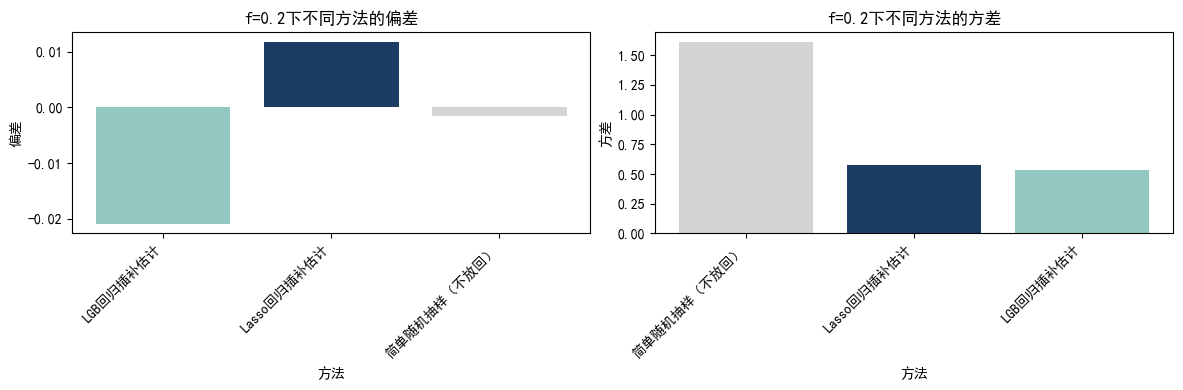

In [586]:
sample_method = [srswr_sample,reg_olse,reg_lgb]
method_name = [
        "简单随机抽样（不放回）",
        "Lasso回归插补估计",
        "LGB回归插补估计"]
color_dict = {
        "简单随机抽样（不放回）": "#D3D5D4",
        "Lasso回归插补估计": "#1C3C63",
        "LGB回归插补估计": "#93C8C0"}
f = 0.2
results = []
for i,method in enumerate(sample_method):
    y_list, y_mean, y_var = simulate_K_method(method, gaokao_merged_df, f, K=1000)
    results.append([method_name[i],y_mean,y_var])
results = pd.DataFrame(results,columns=['method','y_mean','y_var'])

# 绘图
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
true_value = np.mean(gaokao_merged_df['数学'])
bias_df = results[['method','y_mean']]
bias_df['y_mean'] = pd.to_numeric(bias_df['y_mean'], errors='coerce')
bias_df['abs_bias'] = np.abs(bias_df['y_mean'] - true_value)
bias_df = bias_df.sort_values(by='abs_bias', ascending=False)
# 偏差柱状图
axes[0].bar(bias_df['method'], bias_df['y_mean']-true_value, color=[color_dict[method] for method in bias_df['method']])
axes[0].set_xlabel('方法')
axes[0].set_ylabel('偏差')
axes[0].set_title(f'f={f}下不同方法的偏差')
# 旋转x轴标签
plt.setp(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')


var_df = results[['method','y_var']]
var_df = var_df.sort_values(by='y_var',ascending=False)
# 方差柱状图
axes[1].bar(var_df['method'], var_df['y_var'], color=[color_dict[method] for method in var_df['method']])
axes[1].set_xlabel('方法')
axes[1].set_ylabel('方差')
axes[1].set_title(f'f={f}下不同方法的方差')
# 旋转x轴标签
plt.setp(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

## 最小二乘

In [569]:
def reg_olse(data,f):
    # 特征工程
    X_train, X_test, y_train, y_test, train_cols, categorical_feature = feature_engineering(data,f)
    X_train, X_test = X_train[train_cols], X_test[train_cols]
    # 将缺失值填充为平均值
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())
    # 使用Lasso回归
    lasso = Lasso(alpha=0.1)
    lasso.fit(X_train, y_train)
    # 预测
    y_pred = lasso.predict(X_test)
    return (sum(y_train) + sum(y_pred)) / (len(y_train) + len(y_pred))

# 示例
f = 0.2
print("真实总体均值", gaokao_merged_df['数学'].mean(), "LGB回归插补估计", reg_olse(gaokao_merged_df,f))




真实总体均值 79.23638778220452 LGB回归插补估计 78.71226581931124


In [579]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


def feature_engineering(gaokao_merged_df,f=0.2):
    # 初始化LabelEncoder
    le = LabelEncoder()
    # 选择需要编码的非数值列，排除 '姓名' 列
    non_numeric_columns = gaokao_merged_df.select_dtypes(include=['object']).columns
    non_numeric_columns = [col for col in non_numeric_columns if col != '姓名']
    categorical_feature=[]
    # 对选中的非数值列进行编码
    for col in non_numeric_columns:
        gaokao_merged_df[f'{col}_encoded'] = le.fit_transform(gaokao_merged_df[col])
        categorical_feature.append(f'{col}_encoded')
    # 删除原始的非数值列
    gaokao_merged_df = gaokao_merged_df.drop(columns=non_numeric_columns)
    target1 ='数学'
    # 划分数据集
    X = gaokao_merged_df.drop(columns=target1)  # 假设 '成绩' 是目标变量
    y = gaokao_merged_df[target1]  # 目标变量
    # 使用 train_test_split 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-f)#, random_state=42)
    #重置索引
    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    # 确定输入特征
    train_cols = [f for f in X_train.columns if f not in ['姓名','高考数学校排名','高考数学班级排名']]
    return X_train, X_test, y_train, y_test, train_cols, categorical_feature
    


## lgb

In [558]:
from sklearn.model_selection import StratifiedKFold, KFold, GroupKFold
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

def cv_model(clf, train_x, train_y, test_x, test_y,clf_name, categorical_feature,seed = 2024):
    '''
    clf：调用模型
    train_x：训练数据
    train_y：训练数据对应标签
    test_x：测试数据
    clf_name：选择使用模型名
    seed：随机种子
    '''
    #print('分类特征：', categorical_feature)
    cols = train_x.columns
    # print('特征：', cols)
    # print('特征数量：', len(cols))
    # print('数据规模:',train_x.shape,test_x.shape)
    folds = 5
    kf = KFold(n_splits=folds, shuffle=True, random_state=seed)
    oof = np.zeros(train_x.shape[0])
    test_predict = np.zeros(test_x.shape[0])
    cv_scores = []
    test_mse_scores = []
    for i, (train_index, valid_index) in enumerate(kf.split(train_x, train_y)):
        # print('************************************ {} ************************************'.format(str(i+1)))
        trn_x, trn_y, val_x, val_y = train_x.iloc[train_index], train_y[train_index], train_x.iloc[valid_index], train_y[valid_index]
        
        if clf_name == "lgb":
            train_matrix = clf.Dataset(trn_x, label=trn_y)
            valid_matrix = clf.Dataset(val_x, label=val_y)
            params = {
                'boosting_type': 'gbdt',
                'objective': 'regression',
                'metric': 'mse',
                'min_child_weight': 5,
                'num_leaves': 2 ** 5,
                'lambda_l2': 10,
                'feature_fraction': 0.8,
                'bagging_fraction': 0.8,
                'bagging_freq': 4,
                'learning_rate': 0.05,
                'seed': 2024,
                'nthread' : 16,
                'verbose' : -1,
                'early_stopping_rounds':500,
            }
            model = clf.train(params, train_matrix, 1000, valid_sets=[train_matrix, valid_matrix],
                              categorical_feature=categorical_feature)
            val_pred = model.predict(val_x, num_iteration=model.best_iteration)
            test_pred = model.predict(test_x, num_iteration=model.best_iteration)

        oof[valid_index] = val_pred
        test_predict += test_pred / kf.n_splits

        test_mse = mean_squared_error(test_pred, test_y)
        #print(f'test mse: {test_mse}')
        score = mean_squared_error(val_y, val_pred)
        cv_scores.append(score)
        test_mse_scores.append(test_mse)
        # print(f'valid mse:{cv_scores}')
        # print(f'test mse:{test_mse_scores}')
        # print(f'mean valid mse:{np.mean(cv_scores)}')
        # print(f'mean test mse:{np.mean(test_mse_scores)}')
        
    return oof, test_predict, model




In [559]:

def reg_lgb(data,f):
    # 特征工程
    X_train, X_test, y_train, y_test, train_cols, categorical_feature = feature_engineering(data,f)
    # 选择lightgbm模型
    lgb_oof, lgb_test, lgb_model = cv_model(lgb, X_train[train_cols], y_train,  X_test[train_cols],y_test, 'lgb',categorical_feature)

    return (sum(y_train) + sum(lgb_test)) / (len(y_train) + len(lgb_test))
# 示例
f = 0.2
print("真实总体均值", gaokao_merged_df['数学'].mean(), "LGB回归插补估计", reg_lgb(gaokao_merged_df,f))



真实总体均值 79.23638778220452 LGB回归插补估计 79.34270746128625


In [581]:
# 特征工程
X_train, X_test, y_train, y_test, train_cols, categorical_feature = feature_engineering(gaokao_merged_df,f)
# 选择lightgbm模型
lgb_oof, lgb_test, lgb_model = cv_model(lgb, X_train[train_cols], y_train,  X_test[train_cols],y_test, 'lgb',categorical_feature)


In [582]:
train_cols

['班级',
 '高考总分省排名',
 '座号',
 'Test1成绩',
 'Test1校排名',
 'Test1班排名',
 'Test2成绩',
 'Test2班排名',
 'Test2校排名',
 'Test3成绩',
 'Test3校排名',
 'Test3班排名',
 'Test4成绩',
 'Test4校排名',
 'Test4班排名',
 'Test5成绩',
 'Test5市排名',
 'Test5校排名',
 'Test6成绩',
 'Test6总分省排名',
 'Test6校排名',
 'Test6班排名',
 'Test7成绩',
 'Test7数学主观分',
 'Test7数学客观分',
 'Test7数学市排名',
 'Test7数学区县排名',
 'Test7校排名',
 'Test7数学班级排名',
 'Teacher_encoded',
 '文/理_encoded',
 '学生类别_encoded',
 '初中学校_encoded',
 '性别_encoded']

In [584]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 计算训练集的R2, MSE, MAE
train_pred = lgb_model.predict(X_train[train_cols])
train_r2 = r2_score(y_train, train_pred)
train_mse = mean_squared_error(y_train, train_pred)
train_mae = mean_absolute_error(y_train, train_pred)

print(f"训练集 R2: {train_r2:.4f}")
print(f"训练集 MSE: {train_mse:.4f}")
print(f"训练集 MAE: {train_mae:.4f}")

# 计算测试集的R2, MSE, MAE
test_r2 = r2_score(y_test, lgb_test)
test_mse = mean_squared_error(y_test, lgb_test)
test_mae = mean_absolute_error(y_test, lgb_test)

print(f"测试集 R2: {test_r2:.4f}")
print(f"测试集 MSE: {test_mse:.4f}")
print(f"测试集 MAE: {test_mae:.4f}")


训练集 R2: 0.7654
训练集 MSE: 74.4818
训练集 MAE: 6.7234
测试集 R2: 0.6718
测试集 MSE: 93.7817
测试集 MAE: 7.6818


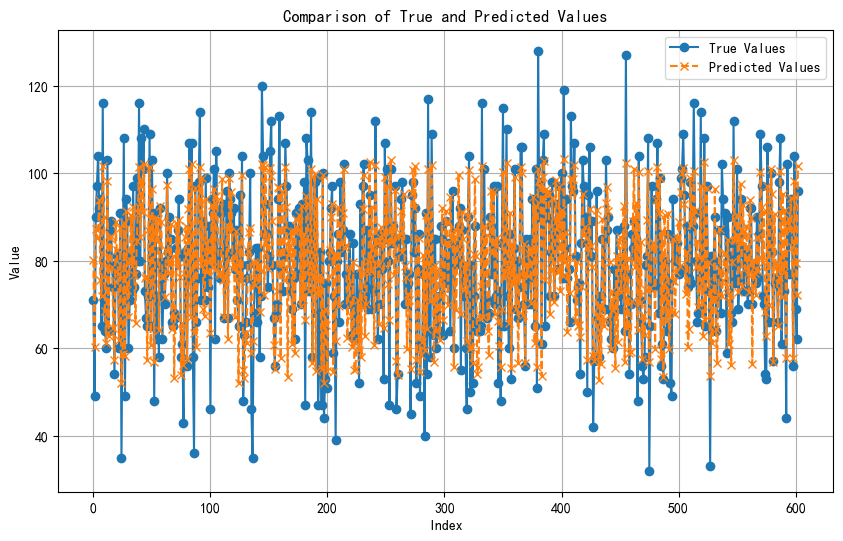

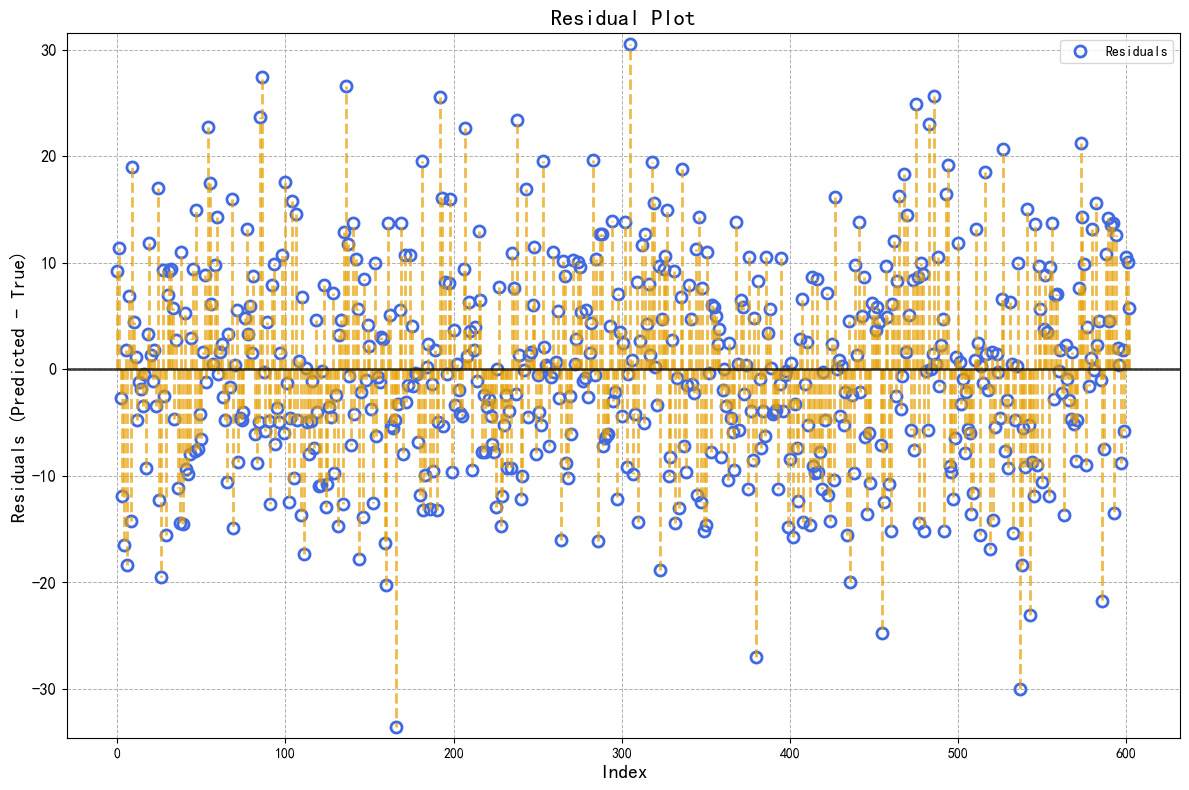

In [583]:
import matplotlib.pyplot as plt
# 创建图形和轴
plt.figure(figsize=(10, 6))  # 设置图形的大小
ax = plt.gca()  # 获取当前轴

# 绘制真实值的折线图
ax.plot(y_test, label='True Values', marker='o', linestyle='-')

# 绘制预测值的折线图
ax.plot(lgb_test, label='Predicted Values', marker='x', linestyle='--')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Comparison of True and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')

# 显示网格（可选）
plt.grid(True)

# 显示图形
plt.show()
import matplotlib.pyplot as plt

# 假设 y_test 和 lgb_test 已经通过某种方式得到了
# y_test 是真实值数组，lgb_test 是预测值数组

# 计算残差
residuals = lgb_test - y_test

# 创建图形和轴
plt.figure(figsize=(12, 8))  # 设置图形的大小
ax = plt.gca()  # 获取当前轴

# 绘制残差图
ax.plot(residuals, color='royalblue', marker='o', linestyle='', markersize=8, markeredgewidth=2, markeredgecolor='royalblue', markerfacecolor='none', label='Residuals')

# 添加垂直线条，从 y=0 到每个数据点的残差值
ax.vlines(x=range(len(residuals)), ymin=0, ymax=residuals, color='#E69F00', linestyle='--', linewidth=2, alpha=0.7)

# 添加图例
plt.legend(loc='upper right')

# 添加标题和轴标签
plt.title('Residual Plot', fontsize=16, fontweight='bold')
plt.xlabel('Index', fontsize=14)
plt.ylabel('Residuals (Predicted - True)', fontsize=14)
plt.gca().tick_params(axis='y', labelsize=12)  # 设置y轴刻度标签的字体大小为12

# 设置坐标轴范围（根据实际数据范围调整）
ax.set_ylim(min(residuals) - 1, max(residuals) + 1)

# 显示网格
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# 添加文本注释（可选）
# for i, residual in enumerate(residuals):
#     ax.text(i+0.5, residual+0.5, f'{residual:.2f}', fontsize=10, ha='right', va='bottom')
    
# 在y=0处添加一条粗横线
ax.axhline(y=0, color='black', linewidth=2, alpha=0.7)

# 显示图形
plt.tight_layout()  # 自动调整布局以避免标签重叠
plt.show()